In [2]:
# imports

from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [3]:
# parameters setup

imgs_path = "data/training3/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 10 # number of most similar images to retrieve

In [4]:

# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [5]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]

print("number of images:",len(files))

number of images: 40


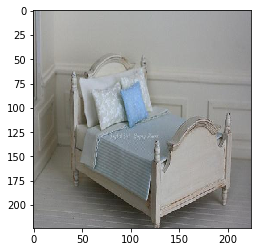

image loaded successfully!


In [6]:
# load an image in PIL format
original = load_img(files[0], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [7]:

numpy_image = img_to_array(original)

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [8]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features


features successfully extracted!
number of image features: 4096


array([[0.        , 0.43267062, 0.        , ..., 0.41291806, 0.        ,
        0.        ]], dtype=float32)

In [9]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [10]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(40, 4096)

In [11]:

cosSimilarities = cosine_similarity(imgs_features)

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

data/training3/00000001.jpg  \
data/training3/00000001.jpg                     1.000000   
data/training3/00000002.jpg                     0.625956   
data/training3/00000003.jpg                     0.658751   
data/training3/00000004.jpg                     0.631186   
data/training3/00000005.jpg                     0.556172   

                             data/training3/00000002.jpg  \
data/training3/00000001.jpg                     0.625956   
data/training3/00000002.jpg                     1.000000   
data/training3/00000003.jpg                     0.787196   
data/training3/00000004.jpg                     0.737896   
data/training3/00000005.jpg                     0.666164   

                             data/training3/00000003.jpg  \
data/training3/00000001.jpg                     0.658751   
data/training3/00000002.jpg                     0.787196   
data/training3/00000003.jpg                     1.000000   
data/training3/00000004.jpg                     0.730331   
data/training3/00000005.jpg                     0.676196   

                             data/training3/00000004.jpg  \
data/training3/00000001.jpg                     0.631186   
data/training3/00000002.jpg                     0.737896   
data/training3/00000003.jpg                     0.730331   
data/training3/00000004.jpg                     1.000000   
data/training3/00000005.jpg                     0.761123   

                             data/training3/00000005.jpg  \
data/training3/00000001.jpg                     0.556172   
data/training3/00000002.jpg                     0.666164   
data/training3/00000003.jpg                     0.676196   
data/training3/00000004.jpg                     0.761123   
data/training3/00000005.jpg                     1.000000   

                             data/training3/00000006.jpg  \
data/training3/00000001.jpg                     0.554129   
data/training3/00000002.jpg                     0.499272   
data/training3/00000003.jpg                     0.603083   
data/training3/00000004.jpg                     0.466607   
data/training3/00000005.jpg                     0.429098   

                             data/training3/00000007.jpg  \
data/training3/00000001.jpg                     0.656312   
data/training3/00000002.jpg                     0.668276   
data/training3/00000003.jpg                     0.668980   
data/training3/00000004.jpg                     0.661287   
data/training3/00000005.jpg                     0.512368   

                             data/training3/00000008.jpg  \
data/training3/00000001.jpg                     0.545246   
data/training3/00000002.jpg                     0.608865   
data/training3/00000003.jpg                     0.665791   
data/training3/00000004.jpg                     0.648359   
data/training3/00000005.jpg                     0.669487   

                             data/training3/00000009.jpg  \
data/training3/00000001.jpg                     0.427471   
data/training3/00000002.jpg                     0.442272   
data/training3/00000003.jpg                     0.441030   
data/training3/00000004.jpg                     0.401898   
data/training3/00000005.jpg                     0.370394   

                             data/training3/00000010.jpg  ...  \
data/training3/00000001.jpg                     0.591804  ...   
data/training3/00000002.jpg                     0.670141  ...   
data/training3/00000003.jpg                     0.678066  ...   
data/training3/00000004.jpg                     0.509902  ...   
data/training3/00000005.jpg                     0.505512  ...   

                             data/training3/00000290.jpg  \
data/training3/00000001.jpg                     0.421829   
data/training3/00000002.jpg                     0.363608   
data/training3/00000003.jpg                     0.431756   
data/training3/00000004.jpg                     0.421534   
data/training3/00000005.jpg                     0.386485   

                            

In [12]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


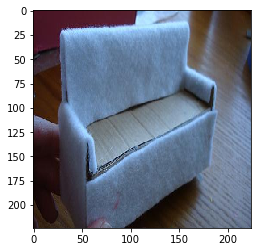

-----------------------------------------------------------------------
most similar products:


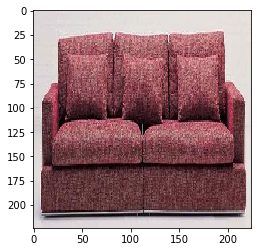

similarity score :  0.55690837


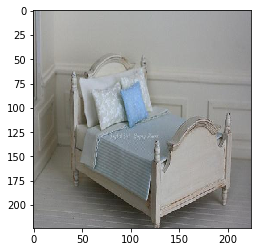

similarity score :  0.52014595


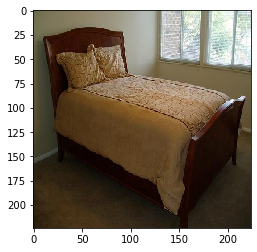

similarity score :  0.51984924


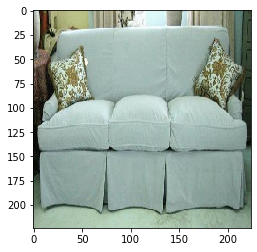

similarity score :  0.49628413


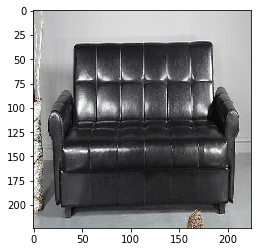

similarity score :  0.4922697


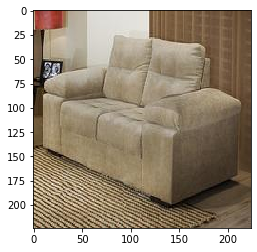

similarity score :  0.4744693


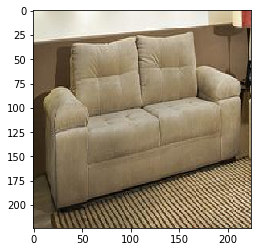

similarity score :  0.47291705


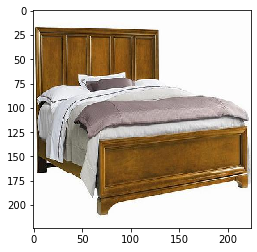

similarity score :  0.47048748


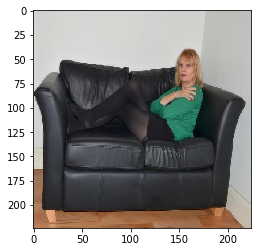

similarity score :  0.46755442


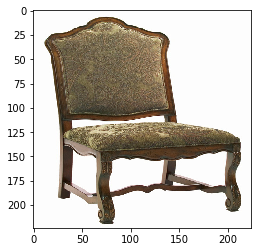

similarity score :  0.4473753


In [24]:
retrieve_most_similar_products(files[15])